<a href="https://colab.research.google.com/github/mark47B/Special-for-Yulia-Efimovna/blob/master/Final_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

  1. Файл (БД с моно_full) с информацией о пациентах со среднетяжелым и тяжелым течением болезни, которым вводились препараты:
- номер истории болезни (CaseID), 
- даты госпитализации (Start, End) 
- пол, 
- возраст, 
- тяжесть ((крайне тяжелое или тяжёлое) / среднетяжелое)
- исходы: умер / выписан /  переведён
- статус вакцинации от ковид.

2. Файл (БД без моно_full) с информацией о пациентах с среднетяжелым и тяжелым течением болезни, которым не вводились новые препараты  - аналогичные данные (см выше).
3. Файл с результатами исследований показатель_D
4. Файл с результатами исследований показатель_F



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Covid19

/content/drive/MyDrive/Colab Notebooks/Covid19


In [ ]:
with_mono = pd.read_excel('БД_с_моно_full.xlsx')
mono = pd.read_excel('БД_без_моно_full.xlsx')
F = pd.read_excel('Показатель_F.xlsx')
D = pd.read_excel('Показатель_D.xlsx')

# Посмотрим на данные 

## Пациенты с терапией
**CaseID** - Номер истории болезни

**Start** - Дата госпитализации

**End** - Дата выписки или смерти

**Gender** - Пол

**Age** - Возраст пациента 

**Ther** - Тяжесть ((крайне тяжелое или тяжёлое) / среднетяжелое)

**Outcome** - Исходы: умер / выписан /  переведён

**Vac** - Статус вакцинации от ковид

Можно отметить, что есть пропуски в CaseID и Vacin

In [ ]:
with_mono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CaseID   2356 non-null   float64       
 1   Gender   2484 non-null   object        
 2   Age      2484 non-null   int64         
 3   Start    2484 non-null   datetime64[ns]
 4   End      2484 non-null   datetime64[ns]
 5   Ther     2484 non-null   object        
 6   Outcome  2484 non-null   object        
 7   Vacin    2358 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 155.4+ KB


In [ ]:
with_mono.sample(10)

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin
1096,380455.0,м,69,2021-07-10,2021-07-22,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,Спутник V
1588,387135.0,ж,57,2021-12-25,2022-01-03,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,Эпиваккорона
1534,382036.0,ж,86,2021-08-22,2021-09-03,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,Нет
2433,383811.0,ж,30,2021-10-05,2021-10-11,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,Нет
1532,169902.0,м,36,2021-12-24,2022-01-26,ИНФ (тяжелое течение) с терапией и ЛП,Выписан,Спутник Лайт
476,381617.0,м,34,2021-08-10,2021-08-20,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,Нет
664,384640.0,ж,57,2021-10-21,2021-10-27,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,Нет
1971,125970.0,м,60,2021-10-29,2021-11-08,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,Нет
115,388462.0,ж,67,2022-01-27,2022-02-07,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN
449,384962.0,м,70,2021-10-28,2021-11-11,ИНФ (тяжелое течение) с терапией без ЛП,Умер,Спутник V


## Пациенты без терапии
**CaseID** - Номер истории болезни

**Start** - Дата госпитализации

**End** - Дата выписки или смерти

**Gender** - Пол

**Age** - Возраст пациента 

**Ther** - Тяжесть ((крайне тяжелое или тяжёлое) / среднетяжелое)

**Outcome** - Исходы: умер / выписан /  переведён

**Vac** - Статус вакцинации от ковид

Аналогично отсутсвуют id пациентов и данные о вакцинации

In [ ]:
mono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6262 entries, 0 to 6261
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CaseID   5602 non-null   float64       
 1   Start    6262 non-null   datetime64[ns]
 2   End      6262 non-null   datetime64[ns]
 3   Gender   6262 non-null   object        
 4   Age      6262 non-null   int64         
 5   Ther     6262 non-null   object        
 6   Outcome  6262 non-null   object        
 7   Vac      5649 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 391.5+ KB


In [ ]:
mono.sample(10)

,CaseID,Start,End,Gender,Age,Ther,Outcome,Vac
3656,385119.0,2021-11-01,2021-11-09,ж,46,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Спутник Лайт
3926,385161.0,2021-11-02,2021-11-15,ж,31,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
4675,382117.0,2021-08-24,2021-09-01,ж,65,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
3943,99306.0,2021-08-28,2021-09-10,м,56,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
180,380408.0,2021-07-08,2021-07-22,ж,76,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
2975,74434.0,2021-07-01,2021-08-03,ж,82,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,Нет
151,384598.0,2021-10-19,2021-10-23,ж,37,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
3422,383522.0,2021-09-29,2021-10-06,ж,70,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Нет
3458,NaN,2021-06-12,2021-06-30,ж,72,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN
726,383924.0,2021-10-07,2021-10-16,ж,71,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,Спутник V


## Показатель F
**Дата результата** - Дата получения результата

**Дата взятия** - Дата получения теста

**CaseID** - ID пациента

**Показатель_F** - Показатель

**Результат** - Результат

Из-за того, что в файле с резултатами исследования показателя F есть "мусорная" информация, появились колонки 6 и 7.

In [ ]:
F.sample(4)

,Дата результата,IDS,Дата взятия,CaseID,Показатель_F,Результат,Unnamed: 6,Unnamed: 7
8386,31.01.2022,216279,31.01.2022,126788.0,Ферритин,264.0,NaN,NaN
3201,22.12.2021,171410,21.12.2021,386968.0,Ферритин,1212.0,NaN,NaN
1962,03.09.2021,913806,03.09.2021,382429.0,Ферритин,231.3,NaN,NaN
1616,15.11.2021,118354,12.11.2021,385558.0,Ферритин,422.2,NaN,NaN


In [ ]:
F = F[['Дата результата', 'IDS', 'Дата взятия', 'CaseID', 'Показатель_F',
       'Результат']]

In [ ]:
F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Дата результата  10377 non-null  object 
 1   IDS              10395 non-null  int64  
 2   Дата взятия      10395 non-null  object 
 3   CaseID           10395 non-null  float64
 4   Показатель_F     10395 non-null  object 
 5   Результат        10377 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 487.4+ KB


## Показатель D

**CaseID** - ID пациента

**Показатель_D** - Показатель

**Результат** - Результат

In [ ]:
D.sample(4)

,CaseID,Показатель,Результат_D,Unnamed: 3,Unnamed: 4,Unnamed: 5,Записей,Уникальных
4893,384302.0,D-димер нг/мл,1401.0,NaN,NaN,NaN,NaN,NaN
7864,388247.0,D-димер нг/мл,1924.0,NaN,NaN,NaN,NaN,NaN
942,382757.0,D-димер нг/мл,113.3,NaN,NaN,NaN,NaN,NaN
528,384114.0,D-димер нг/мл,413.4,NaN,NaN,NaN,NaN,NaN


In [ ]:
D = D[['CaseID', 'Показатель', 'Результат_D']]

In [ ]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10541 entries, 0 to 10540
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CaseID       10541 non-null  float64
 1   Показатель   10541 non-null  object 
 2   Результат_D  10001 non-null  object 
dtypes: float64(1), object(2)
memory usage: 247.2+ KB


# Визуализация 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

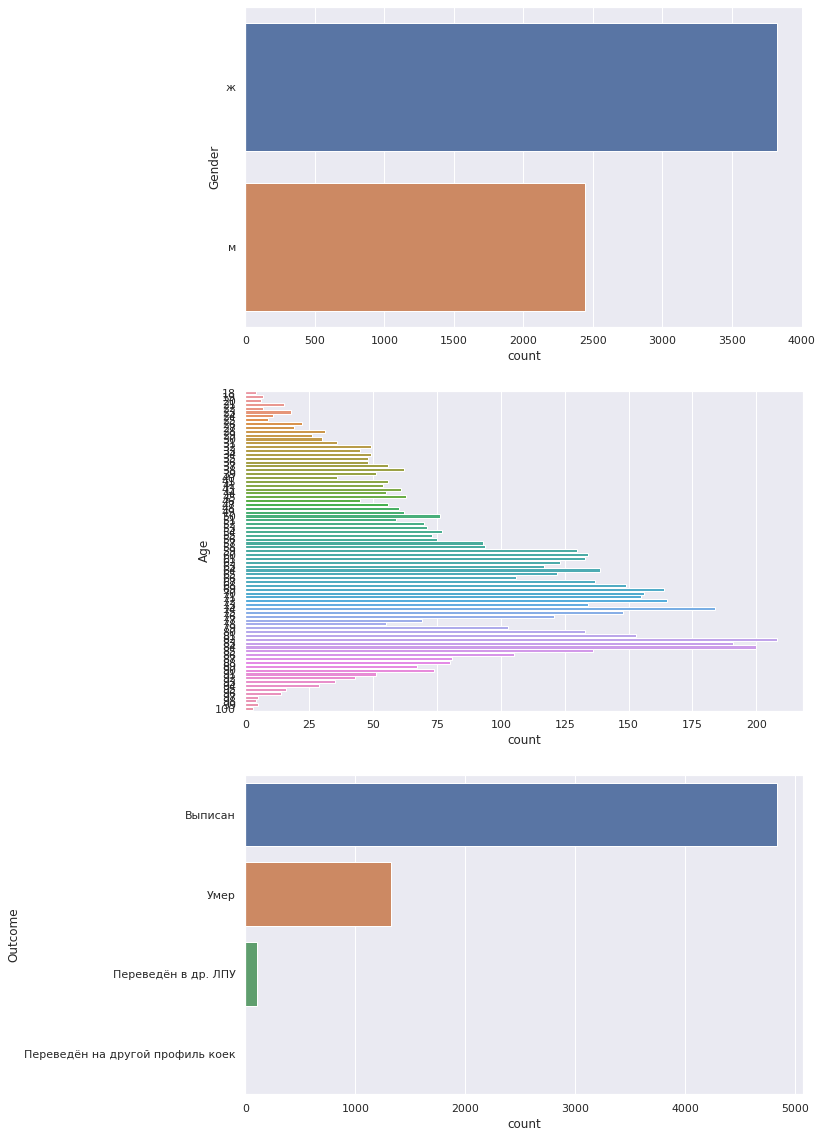

In [ ]:
cat_cols = ['Gender','Age','Outcome']
fig, axs = plt.subplots(3, 1, figsize=(10,20),gridspec_kw={'height_ratios': [1, 10, 1]})
for i, feature in enumerate(cat_cols):
    plt.subplot(3, 1, i+1)   
    sns.countplot(y=feature, data=mono)

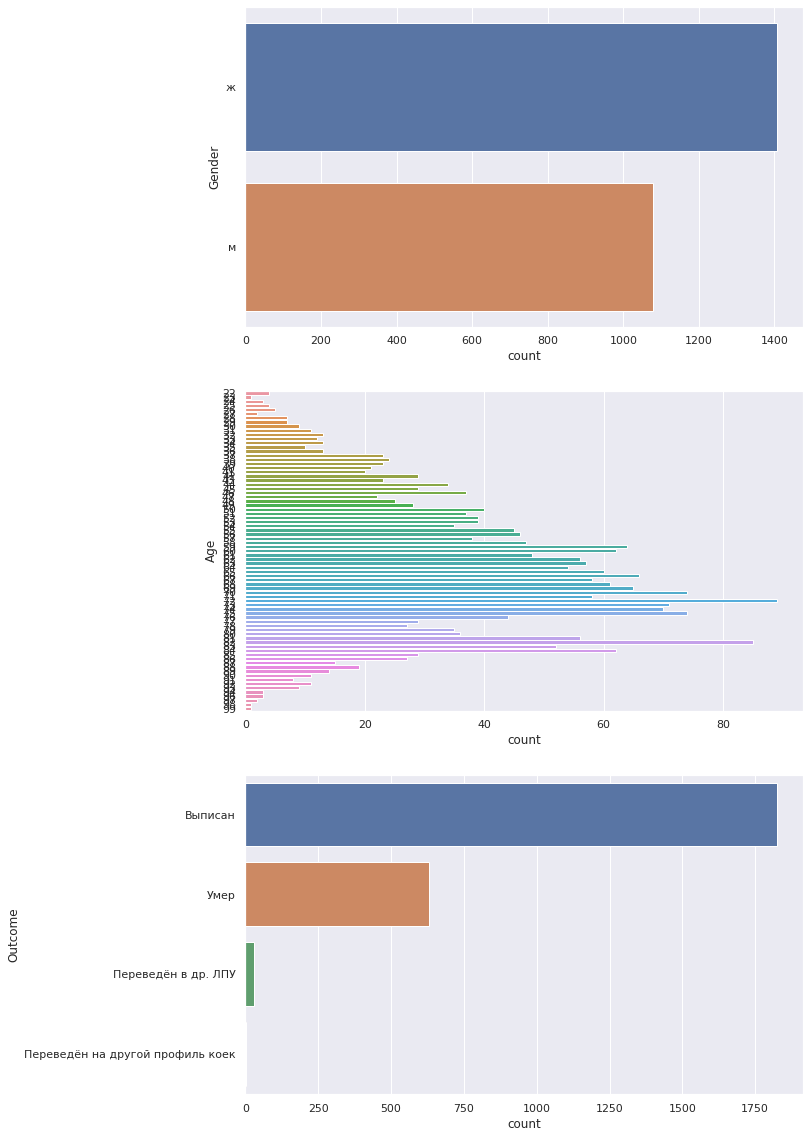

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10,20),gridspec_kw={'height_ratios': [1, 5, 1]})
axs[0].set_xlim(0, 4000)
axs[1].set_xlim(0, 225)
axs[2].set_xlim(0, 5000)
for i, feature in enumerate(cat_cols):
    plt.subplot(3, 1, i+1)   
    sns.countplot(y=feature, data=with_mono)

# Предобработка данных

Из ТЗ:
1. Провести предварительную обработку данных:

- <s>Загрузить данные в Dataframe, если у какой-то записи из файлов с информацией о пациентах отсутствует CaseID, присвоить (учесть, что он не должен встречаться в других файлах) </s>

- <s>Проверить уникальность записей. Если есть повторяющиеся, оставлять последнее пребывание в стационаре. </s>
- <s>Объединить данные из таблиц</s>
- Проверить, есть ли пустые значения в данных по показателям
- Создать dataframe только с данными пациентов, у которых известен исход (жив/ мертв)

Задачи, которые возникли при просмотре данных: 
1. <s>Перевести CaseID в int </s>
2. <s>Перекодировать Gender в 0(М) и 1(Ж)</s>
3. Обработать Ther
  - Разделить на несколько колонок (подумать как)
4. <s>Перекодировать Outcome в 0(умер) 1(выписан) </s>
5. Сделать кодировку для вакцин 0 - нет, 1 - , 2 (или oneHot encoding что лучше и какую модель будем использовать, нужно от этого отталкиваться)
6. Нужно рассмотреть множество уникальных ID из mono и with_mono и посмотреть на совпадения, так как может оказаться, что один пациент проходил терапию с препаратами и без
7. Также нужно удалить дубли в F и D 

In [ ]:
all_data = [mono, with_mono, F, D]

## Переведём F 'Дата результата' и 'Дата взятия' из object в datetime64[ns]


In [ ]:
F['Дата результата'] = pd.to_datetime(F['Дата результата'], format="%d.%m.%Y")
F['Дата взятия'] = pd.to_datetime(F['Дата взятия'], format="%d.%m.%Y")

## Избавимся от NaN

Дропнем все NaN-ы, хоть в задании и сказано сгенерировать уникальные + переведём CaseID в int

In [ ]:
for i in all_data:
  i.dropna(axis=0, how='any', subset=['CaseID'], inplace=True)
  i['CaseID'] = i['CaseID'].astype(int) # Приводим CaseID к типу int

In [ ]:
F.dropna(axis=0, how='any', subset=['Результат'], inplace=True)
D.dropna(axis=0, how='any', subset=['Результат_D'], inplace=True)

### Заполняем NaN-ы CaseID по ТЗ
Если у какой-то записи из файлов с информацией о пациентах отсутствует CaseID, присвоить (учесть, что он не должен встречаться в других файлах)

In [ ]:
print(max(mono.CaseID))
print(max(with_mono.CaseID))
print(max(F.CaseID))
print(max(D.CaseID))

389919
389756
390077
390077


In [ ]:
print(len(mono[mono.CaseID == -1]))
print(len(with_mono[with_mono.CaseID == -1]))

0
0


In [ ]:
import random 
uarray_mono = np.random.choice(np.arange(400000, 401000), replace=False, size=(660, 1))
uarray_with_mono= np.random.choice(np.arange(401001, 402000), replace=False, size=(128, 1))
mask_mono = mono.CaseID == -1
mask_with_mono = with_mono.CaseID == -1

In [ ]:
mono.loc[mask_mono, 'CaseID'] = uarray_mono
with_mono.loc[mask_with_mono, 'CaseID'] = uarray_with_mono

Заменим NaN-ы в поле Вакцинация модой

In [ ]:
with_mono.Vacin.mode()

0    Нет
dtype: object

In [ ]:
mono.Vac.mode()

0    Нет
dtype: object

In [ ]:
with_mono.loc[with_mono.Vacin.isna(), 'Vacin'] = 'Нет'
mono.loc[mono.Vac.isna(), 'Vac'] = 'Нет'

## Пример ручной кодировки(далее покажем как лучше)

*  Также уберём пациентов со значениями Outcome - 'Переведён в др. ЛПУ', 'Переведён на другой профиль коек'
*  Перекодировать Outcome в 0(умер) 1(выписан) 
*  перекодировать Gender в 0(М) и 1(Ж)

In [ ]:
with_mono['Outcome'].unique()

array(['Выписан', 'Умер', 'Переведён в др. ЛПУ',
       'Переведён на другой профиль коек'], dtype=object)

In [ ]:
mono['Outcome'].unique()

array(['Выписан', 'Умер', 'Переведён в др. ЛПУ',
       'Переведён на другой профиль коек'], dtype=object)

In [ ]:
mono = mono.loc[~((mono['Outcome'] == 'Переведён в др. ЛПУ') | (mono['Outcome'] == 'Переведён на другой профиль коек'))]
with_mono = with_mono.loc[~((with_mono['Outcome'] == 'Переведён в др. ЛПУ') | (with_mono['Outcome'] == 'Переведён на другой профиль коек'))]

Заменим значения 'Выписан', 'Умер' на 1 и 0

In [ ]:
mask = with_mono['Outcome'] == 'Выписан'
with_mono.loc[mask, 'Outcome'] = 1
mask = with_mono['Outcome'] == 'Умер'
with_mono.loc[mask, 'Outcome'] = 0

print(with_mono['Outcome'].unique())

mask = mono['Outcome'] == 'Выписан'
mono.loc[mask, 'Outcome'] = 1
mask = mono['Outcome'] == 'Умер'
mono.loc[mask, 'Outcome'] = 0


print(mono['Outcome'].unique())

[1 0]
[1 0]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Перекодируем гендер м - 0 ж - 1

In [ ]:
with_mono['Gender'].unique()
with_mono.loc[with_mono['Gender'] == 'м', 'Gender'] = 0
with_mono.loc[with_mono['Gender'] == 'ж', 'Gender'] = 1
print(with_mono['Gender'].unique())

mono.loc[mono['Gender'] == 'м', 'Gender'] = 0
mono.loc[mono['Gender'] == 'ж', 'Gender'] = 1

print(mono['Gender'].unique())

[1 0]
[1 0]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Проверим уникальность ID в mono и with_mono

In [ ]:
mono_IDs = set(mono['CaseID'].unique())
with_mono_IDs = set(with_mono['CaseID'].unique())
intersection = mono_IDs & with_mono_IDs

In [ ]:
with_mono[with_mono['CaseID'].isin(intersection)]

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin
1,386318,1,92,2021-12-05,2022-01-05,ИНФ (тяжелое течение) с терапией без ЛП,1,Нет
329,382849,1,41,2021-09-14,2021-09-18,ИНФ (среднетяжелое течение) с терапией без ЛП,1,Спутник V
385,384848,0,61,2021-10-26,2021-11-08,ИНФ (тяжелое течение) с терапией без ЛП,1,Нет
391,300464,1,80,2021-07-30,2021-08-11,ИНФ (среднетяжелое течение) с терапией без ЛП,1,Нет
410,382889,1,56,2021-10-19,2021-12-09,ИНФ (среднетяжелое течение) с терапией и ЛП,1,Нет
439,381548,1,49,2021-08-08,2021-08-16,ИНФ (тяжелое течение) с терапией без ЛП,1,Нет
520,237975,0,82,2021-12-27,2022-01-12,ИНФ (среднетяжелое течение) с терапией без ЛП,1,Нет
578,378869,0,42,2021-06-15,2021-07-15,ИНФ (тяжелое течение) с терапией без ЛП,1,Нет
701,380988,0,73,2021-10-14,2021-10-25,ИНФ (среднетяжелое течение) с терапией без ЛП,1,Эпиваккорона
718,313061,1,49,2021-10-20,2021-11-08,ИНФ (среднетяжелое течение) с терапией без ЛП,1,Нет


In [ ]:
mono[mono['CaseID'].isin(intersection)]

,CaseID,Start,End,Gender,Age,Ther,Outcome,Vac
16,386318,2022-01-19,2022-02-01,1,92,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет
863,382849,2021-09-19,2021-09-22,1,41,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет
1027,384848,2021-06-22,2021-07-09,0,81,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет
1038,300464,2021-08-16,2021-08-30,1,80,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет
1074,382889,2021-09-15,2021-10-01,1,56,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет
1150,381548,2021-08-29,2021-09-07,1,49,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Спутник V
1355,237975,2022-02-10,2022-02-18,0,82,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет
1505,378869,2021-08-01,2021-08-04,0,42,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет
1851,380988,2021-07-23,2021-08-03,0,61,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Спутник V
1878,313061,2021-07-12,2021-07-22,1,49,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет


In [ ]:
len(intersection)

38

Вывод, у нас есть пациенты, которые проходили лечение без ЛП в одно время и с ЛП в другое время.

# Удаляем дубликаты


## Оставим последнее пребывание в стационаре

In [ ]:
for i in mono.CaseID:
  mask = mono.CaseID == i # Выбираем все строчки с одинаковым CaseID
  if len(mono.loc[mask]) >= 2 and i != -2 and i != -1:
    mask2 =  mask & (mono.Start == max(mono.loc[mask].Start)) # Находим нужную нам запись
    mask3 = mask & ~mask2 # Делаем маску для всех записей, кроме нужной, чтобы удалить их
    mono.loc[mask3, 'CaseID'] = -2  # CaseID == -2 подлежат удалению

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [ ]:
mono = mono[~(mono['CaseID'] == -2)]

In [ ]:
for i in with_mono.CaseID:
  mask = with_mono.CaseID == i # Выбираем все строчки с одинаковым CaseID
  if len(with_mono.loc[mask]) >= 2 and i != -2 and i != -1:
    mask2 =  mask & (with_mono.Start == max(with_mono.loc[mask].Start)) # Находим нужную нам запись
    mask3 = mask & ~mask2 # Делаем маску для всех записей, кроме нужной, чтобы удалить их
    with_mono.loc[mask3, 'CaseID'] = -2  # CaseID == -2 подлежат удалению

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [ ]:
with_mono = with_mono[~(with_mono['CaseID'] == -2)]

## Оставим последний результат теста

In [ ]:
for i in F.CaseID:
  mask = F.CaseID == i # Выбираем все строчки с одинаковым CaseID
  if len(F.loc[mask]) >= 2 and i != -2 and i != -1:
    mask2 =  mask & (F['Дата результата'] == max(F.loc[mask, 'Дата результата'])) # Находим нужную нам запись
    mask3 = mask & ~mask2 # Делаем маску для всех записей, кроме нужной, чтобы удалить их
    F.loc[mask3, 'CaseID'] = -2  # CaseID == -2 подлежат удалению

In [ ]:
F = F[~(F['CaseID'] == -2)]

## Удалим дубликаты

In [ ]:
mono[mono.duplicated(['CaseID'], keep=False)]

,CaseID,Start,End,Gender,Age,Ther,Outcome,Vac
195,385424,2021-11-09,2021-11-26,0,43,ИНФ (среднетяжелое течение) без ЛП и терапии,0,Нет
196,385424,2021-11-09,2021-11-26,0,43,ИНФ (тяжелое течение) без ЛП и терапии,0,Нет
2077,380034,2021-07-01,2021-07-23,1,60,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет
2078,380034,2021-07-01,2021-07-23,1,61,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет


Удалим записи 195 и 2078

In [ ]:
mono = mono.drop(index=[195, 2078])

In [ ]:
with_mono[with_mono.duplicated(['CaseID'], keep=False)]

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin


In [ ]:
F[F.duplicated(['CaseID'], keep=False)]

,Дата результата,IDS,Дата взятия,CaseID,Показатель_F,Результат
67,2022-02-03,220583,2022-02-02,388879,Ферритин,30.97
68,2022-02-03,220583,2022-02-02,388879,Ферритин,935.5
373,2022-02-03,220617,2022-02-02,388871,Ферритин,1675.0
374,2022-02-03,220617,2022-02-02,388871,Ферритин,448.7
729,2021-09-17,927325,2021-09-15,288162,Ферритин,110.0
730,2021-09-17,927325,2021-09-15,288162,Ферритин,1110.0
853,2022-02-03,220585,2022-02-03,224087,Ферритин,101.4
854,2022-02-03,220585,2022-02-03,224087,Ферритин,472.0
1072,2021-09-15,925741,2021-09-14,282110,Ферритин,11.9
1073,2021-09-15,925741,2021-09-14,282110,Ферритин,111.9


Удалим первое значение

In [ ]:
F = F[~(F.duplicated(['CaseID'], keep='last'))]

In [ ]:
D[D.duplicated(['CaseID'], keep=False)]

,CaseID,Показатель,Результат_D
25,386318,D-димер нг/мл,241.7
26,386318,D-димер нг/мл,57.9
29,389746,D-димер нг/мл,222.77
30,389746,D-димер нг/мл,168.0
55,380956,D-димер нг/мл,331.9
...,...,...,...
10501,385404,D-димер нг/мл,167.7
10522,382468,D-димер нг/мл,898.9
10523,382468,D-димер нг/мл,164.7
10535,384403,D-димер нг/мл,434.4


In [ ]:
D = D[~(D.duplicated(['CaseID'], keep='last'))]

In [ ]:
for i in all_data:
  print(i.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5602 entries, 0 to 6261
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CaseID   5602 non-null   int64         
 1   Start    5602 non-null   datetime64[ns]
 2   End      5602 non-null   datetime64[ns]
 3   Gender   5602 non-null   object        
 4   Age      5602 non-null   int64         
 5   Ther     5602 non-null   object        
 6   Outcome  5602 non-null   object        
 7   Vac      5602 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 393.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2483
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CaseID   2356 non-null   int64         
 1   Gender   2356 non-null   object        
 2   Age      2356 non-null   int64         
 3   Start    2356 non-null   datetim

# Объединить данные из таблиц

In [ ]:
mono = mono.merge(F, how='inner', on='CaseID')
mono = mono.merge(D, how='inner', on='CaseID')

In [ ]:
with_mono = with_mono.merge(F, how='inner', on='CaseID')
with_mono = with_mono.merge(D, how='inner', on='CaseID')

In [ ]:
with_mono.head()

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Дата результата,IDS,Дата взятия,Показатель_F,Результат,Показатель,Результат_D
0,383563,1,46,2021-09-30,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,1,Нет,2021-10-01,948009,2021-09-30,Ферритин,66.13,D-димер нг/мл,77.62
1,386318,1,92,2021-12-05,2022-01-05,ИНФ (тяжелое течение) с терапией без ЛП,1,Нет,2022-01-20,202179,2022-01-19,Ферритин,177.3,D-димер нг/мл,57.9
2,238599,1,55,2021-07-08,2021-07-23,ИНФ (среднетяжелое течение) с терапией без ЛП,1,Нет,2021-07-09,852863,2021-07-08,Ферритин,872.5,D-димер нг/мл,83.51
3,387627,0,74,2022-01-07,2022-02-02,ИНФ (среднетяжелое течение) с терапией без ЛП,1,Нет,2022-01-10,192346,2022-01-08,Ферритин,534.3,D-димер нг/мл,604.0
4,382371,1,61,2021-09-01,2021-10-01,ИНФ (тяжелое течение) с терапией без ЛП,1,Нет,2021-09-03,913127,2021-09-01,Ферритин,1133.0,D-димер нг/мл,449.6


In [ ]:
all_data = [mono, with_mono]

In [ ]:
with_mono.set_index('CaseID', inplace=True)
mono.set_index('CaseID', inplace=True)

In [ ]:
mono.Outcome.unique()

array([1, 0], dtype=object)

# Создать пары пациентов из 2ух групп по правилу
- один пол
- возраст +/- 3 года
- уровень показатель_D +/- 10%
- уровень показатель_F +/- 10%
- схожая тяжесть заболевания (крайне тяжелые и тяжелые – одна группа, среднетяжелые – вторая группа)
Как изменятся группы, если добавить дополнительный критерий - одинаковый статус вакцинации

In [ ]:
mono.Ther.unique()

array(['ИНФ (среднетяжелое течение) без ЛП и терапии',
       'ИНФ (тяжелое течение) без ЛП и терапии',
       'ИНФ (среднетяжелое течение) с ЛП без терапии',
       'ИНФ (крайне тяжелое течение) без ЛП и терапии'], dtype=object)

In [ ]:
with_mono.Ther.unique()

array(['ИНФ (тяжелое течение) с терапией без ЛП',
       'ИНФ (среднетяжелое течение) с терапией без ЛП',
       'ИНФ (тяжелое течение) с терапией и ЛП',
       'ИНФ (среднетяжелое течение) с терапией и ЛП',
       'ИНФ (крайне тяжелое течение) с терапией без ЛП',
       'ИНФ (крайне  тяжелое течение) с терапией и ЛП'], dtype=object)

ТЗ:

2. Привести данные описательной статистики для группы пациентов, которым вводились и не вводились препараты (% м и ж, средний возраст, % исходов в группах). Визуализировать результаты.
3. Создать пары пациентов из 2ух групп по правилу
- один пол
- возраст +/- 3 года
- уровень показатель_D +/- 10%
- уровень показатель_F +/- 10%
- схожая тяжесть заболевания (крайне тяжелые и тяжелые – одна группа, среднетяжелые – вторая группа)
Как изменятся группы, если добавить дополнительный критерий - одинаковый статус вакцинации


In [ ]:
mono_y_D_F = mono[["Age","Результат","Результат_D"]].copy()
with_mono_y_D_F = with_mono[["Age","Результат","Результат_D"]].copy()

In [ ]:
len(mono_y_D_F)

5289

In [ ]:
len(with_mono_y_D_F)

2289

In [ ]:
mono_and_with_mono_y_D_F=pd.concat([mono_y_D_F, with_mono_y_D_F], ignore_index=False)

In [ ]:
mono_and_with_mono_y_D_F

,Age,Результат,Результат_D
CaseID,,,
381492,82,1146.0,>3000
386532,65,54.22,747.5
372366,76,1155.0,1492.0
379796,72,981.0,62.3
381175,40,78.6,246.8
...,...,...,...
385894,56,140.0,987.2
384105,74,429.0,1067.0
385476,76,1584.0,2488.0


In [ ]:
mono_y_D_F.columns=mono_y_D_F.columns.str.replace('>','')
with_mono_y_D_F.columns=with_mono_y_D_F.columns.str.replace('>','')

In [ ]:
mono_y_D_F['Результат'] = mono_y_D_F['Результат'].apply(pd.to_numeric, errors='coerce')
with_mono_y_D_F['Результат'] = with_mono_y_D_F['Результат'].apply(pd.to_numeric, errors='coerce')

In [ ]:
mono_y_D_F['Результат_D'] = mono_y_D_F['Результат_D'].apply(pd.to_numeric, errors='coerce')
with_mono_y_D_F['Результат_D'] = with_mono_y_D_F['Результат_D'].apply(pd.to_numeric, errors='coerce')

In [ ]:
mono_y_D_F=mono_y_D_F.dropna()
with_mono_y_D_F=with_mono_y_D_F.dropna()

In [ ]:
mono_and_with_mono_y_D_F=pd.concat([mono_y_D_F, with_mono_y_D_F], ignore_index=False)

In [ ]:
mono_and_with_mono_y_D_F

,Age,Результат,Результат_D
CaseID,,,
386532,65,54.22,747.5
372366,76,1155.00,1492.0
379796,72,981.00,62.3
381175,40,78.60,246.8
388061,53,171.10,299.3
...,...,...,...
386063,45,1200.00,136.2
385894,56,140.00,987.2
384105,74,429.00,1067.0


In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_mono_and_with_mono_y_D_F = mono_and_with_mono_y_D_F.copy()

In [ ]:
normalized_mono_and_with_mono_y_D_F[['Age', 'Результат', 	'Результат_D']] = preprocessing.normalize(mono_and_with_mono_y_D_F)

In [ ]:
normalized_mono_and_with_mono_y_D_F

,Age,Результат,Результат_D
CaseID,,,
386532,0.086404,0.072074,0.993650
372366,0.040247,0.611645,0.790108
379796,0.073051,0.995323,0.063210
381175,0.152623,0.299903,0.941682
388061,0.151948,0.490532,0.858073
...,...,...,...
386063,0.037235,0.992931,0.112698
385894,0.056076,0.140189,0.988536
384105,0.064214,0.372269,0.925901


In [ ]:
names=['Age','Результат_F','Результат_D']

In [ ]:
normalized_mono_y_D_F=normalized_mono_and_with_mono_y_D_F.iloc[0:5289]
normalized_with_mono_y_D_F=normalized_mono_and_with_mono_y_D_F[5289:]

In [ ]:
normalized_mono_y_D_F=pd.concat([normalized_mono_y_D_F, ], ignore_index=False)
normalized_mono_y_D_F

,Age,Результат,Результат_D
CaseID,,,
386532,0.086404,0.072074,0.993650
372366,0.040247,0.611645,0.790108
379796,0.073051,0.995323,0.063210
381175,0.152623,0.299903,0.941682
388061,0.151948,0.490532,0.858073
...,...,...,...
384627,0.074150,0.934922,0.347021
313061,0.095533,0.878323,0.468426
379640,0.050210,0.980099,0.192053


In [ ]:
normalized_with_mono_y_D_F=pd.concat([normalized_with_mono_y_D_F, ], ignore_index=False)
normalized_with_mono_y_D_F

,Age,Результат,Результат_D
CaseID,,,
386517,0.024809,0.960184,0.278266
382538,0.057659,0.904886,0.421731
388457,0.150038,0.753805,0.639740
383053,0.088276,0.945613,0.313086
382518,0.105187,0.146385,0.983620
...,...,...,...
386063,0.037235,0.992931,0.112698
385894,0.056076,0.140189,0.988536
384105,0.064214,0.372269,0.925901


In [ ]:
Ther_Age_for_with_mono=with_mono.copy()
Ther_Age_for_with_mono.columns=Ther_Age_for_with_mono.columns.str.replace('>','')
Ther_Age_for_with_mono['Результат_D'] = Ther_Age_for_with_mono['Результат_D'].apply(pd.to_numeric, errors='coerce')
Ther_Age_for_with_mono['Результат'] = Ther_Age_for_with_mono['Результат'].apply(pd.to_numeric, errors='coerce')
Ther_Age_for_with_mono=Ther_Age_for_with_mono[['Ther','Gender','Результат_D','Результат','Age']].dropna()
Ther_Age_for_with_mono=Ther_Age_for_with_mono[['Ther','Gender']]
Ther_Age_for_with_mono=pd.concat([Ther_Age_for_with_mono, ], ignore_index=False)
Ther_Age_for_with_mono

,Ther,Gender
CaseID,,
383563,ИНФ (тяжелое течение) с терапией без ЛП,1
386318,ИНФ (тяжелое течение) с терапией без ЛП,1
238599,ИНФ (среднетяжелое течение) с терапией без ЛП,1
387627,ИНФ (среднетяжелое течение) с терапией без ЛП,0
382371,ИНФ (тяжелое течение) с терапией без ЛП,1
...,...,...
386063,ИНФ (среднетяжелое течение) с терапией без ЛП,0
385894,ИНФ (среднетяжелое течение) с терапией без ЛП,1
384105,ИНФ (тяжелое течение) с терапией без ЛП,1


In [ ]:
Ther_Age_for_mono=mono.copy()
Ther_Age_for_mono.columns=Ther_Age_for_mono.columns.str.replace('>','')
Ther_Age_for_mono['Результат_D'] = Ther_Age_for_mono['Результат_D'].apply(pd.to_numeric, errors='coerce')
Ther_Age_for_mono['Результат'] = Ther_Age_for_mono['Результат'].apply(pd.to_numeric, errors='coerce')
Ther_Age_for_mono=Ther_Age_for_mono[['Ther','Gender','Результат_D','Результат','Age']].dropna()
Ther_Age_for_mono=Ther_Age_for_mono[['Ther','Gender']]
Ther_Age_for_mono=pd.concat([Ther_Age_for_mono, ], ignore_index=False)
Ther_Age_for_mono

,Ther,Gender
CaseID,,
386532,ИНФ (среднетяжелое течение) без ЛП и терапии,1
372366,ИНФ (тяжелое течение) без ЛП и терапии,0
379796,ИНФ (среднетяжелое течение) без ЛП и терапии,1
381175,ИНФ (тяжелое течение) без ЛП и терапии,1
388061,ИНФ (среднетяжелое течение) без ЛП и терапии,1
...,...,...
387693,ИНФ (тяжелое течение) без ЛП и терапии,0
388760,ИНФ (среднетяжелое течение) без ЛП и терапии,1
382154,ИНФ (среднетяжелое течение) без ЛП и терапии,1


In [ ]:
names=['Age','D','F','Ther','Gender']

In [ ]:
normalized_mono_y_D_F= normalized_mono_y_D_F.merge(Ther_Age_for_mono, how='inner', left_index=True, right_index=True)
normalized_mono_y_D_F

,Age,Результат,Результат_D,Ther,Gender
CaseID,,,,,
731,0.053483,0.631486,0.773541,ИНФ (среднетяжелое течение) без ЛП и терапии,1
1122,0.040810,0.038907,0.998409,ИНФ (среднетяжелое течение) без ЛП и терапии,0
1142,0.082054,0.733534,0.674681,ИНФ (среднетяжелое течение) без ЛП и терапии,0
1972,0.099769,0.878352,0.467487,ИНФ (среднетяжелое течение) без ЛП и терапии,1
2203,0.129138,0.366979,0.921222,ИНФ (среднетяжелое течение) без ЛП и терапии,1
...,...,...,...,...,...
389540,0.040717,0.981676,0.186156,ИНФ (среднетяжелое течение) без ЛП и терапии,0
389589,0.028799,0.711190,0.702410,ИНФ (тяжелое течение) без ЛП и терапии,0
389607,0.031895,0.992971,0.113981,ИНФ (среднетяжелое течение) без ЛП и терапии,0


In [ ]:
normalized_with_mono_y_D_F=normalized_with_mono_y_D_F.merge(Ther_Age_for_with_mono, how='inner', left_index=True, right_index=True)
normalized_with_mono_y_D_F

,Age,Результат,Результат_D,Ther,Gender
CaseID,,,,,
386517,0.024809,0.960184,0.278266,ИНФ (среднетяжелое течение) с терапией без ЛП,1
382538,0.057659,0.904886,0.421731,ИНФ (среднетяжелое течение) с терапией без ЛП,0
388457,0.150038,0.753805,0.639740,ИНФ (среднетяжелое течение) с терапией без ЛП,0
383053,0.088276,0.945613,0.313086,ИНФ (среднетяжелое течение) с терапией без ЛП,1
382518,0.105187,0.146385,0.983620,ИНФ (тяжелое течение) с терапией без ЛП,1
...,...,...,...,...,...
386063,0.037235,0.992931,0.112698,ИНФ (среднетяжелое течение) с терапией без ЛП,0
385894,0.056076,0.140189,0.988536,ИНФ (среднетяжелое течение) с терапией без ЛП,1
384105,0.064214,0.372269,0.925901,ИНФ (тяжелое течение) с терапией без ЛП,1


In [ ]:
mono_male_hard=normalized_mono_y_D_F[(normalized_mono_y_D_F['Gender'] == 0)&((normalized_mono_y_D_F['Ther'] == 'ИНФ (тяжелое течение) без ЛП и терапии') | (normalized_mono_y_D_F['Ther'] == 'ИНФ (крайне тяжелое течение) без ЛП и терапии'))]
mono_male_middle=normalized_mono_y_D_F[(normalized_mono_y_D_F['Gender'] == 0)&((normalized_mono_y_D_F['Ther'] == 'ИНФ (среднетяжелое течение) без ЛП и терапии')| (normalized_mono_y_D_F['Ther'] == 'ИНФ (среднетяжелое течение) с ЛП без терапии'))]
mono_female_hard=normalized_mono_y_D_F[(normalized_mono_y_D_F['Gender'] == 1)&((normalized_mono_y_D_F['Ther'] == 'ИНФ (тяжелое течение) без ЛП и терапии') | (normalized_mono_y_D_F['Ther'] == 'ИНФ (крайне тяжелое течение) без ЛП и терапии'))]
mono_female_middle=normalized_mono_y_D_F[(normalized_mono_y_D_F['Gender'] == 1)&((normalized_mono_y_D_F['Ther'] == 'ИНФ (среднетяжелое течение) без ЛП и терапии')| (normalized_mono_y_D_F['Ther'] == 'ИНФ (среднетяжелое течение) с ЛП без терапии'))]

with_mono_male_hard=normalized_with_mono_y_D_F[(normalized_with_mono_y_D_F['Gender'] == 0)&((normalized_with_mono_y_D_F['Ther'] == 'ИНФ (крайне  тяжелое течение) с терапией и ЛП') | (normalized_with_mono_y_D_F['Ther'] == 'ИНФ (крайне  тяжелое течение) с терапией и ЛП')| (normalized_with_mono_y_D_F['Ther'] == 'ИНФ (тяжелое течение) с терапией и ЛП')| (normalized_with_mono_y_D_F['Ther'] == 'ИНФ (тяжелое течение) с терапией без ЛП'))]
with_mono_male_middle=normalized_with_mono_y_D_F[(normalized_with_mono_y_D_F['Gender'] == 0)&((normalized_with_mono_y_D_F['Ther'] == 'ИНФ (среднетяжелое течение) с терапией и ЛП')| (normalized_with_mono_y_D_F['Ther'] == 'ИНФ (среднетяжелое течение) с терапией без ЛП'))]
                    
with_mono_female_hard=normalized_with_mono_y_D_F[(normalized_with_mono_y_D_F['Gender'] == 1)&((normalized_with_mono_y_D_F['Ther'] == 'ИНФ (крайне  тяжелое течение) с терапией и ЛП') | (normalized_with_mono_y_D_F['Ther'] == 'ИНФ (крайне  тяжелое течение) с терапией и ЛП')| (normalized_with_mono_y_D_F['Ther'] == 'ИНФ (тяжелое течение) с терапией и ЛП')| (normalized_with_mono_y_D_F['Ther'] == 'ИНФ (тяжелое течение) с терапией без ЛП'))]
with_mono_female_middle=normalized_with_mono_y_D_F[(normalized_with_mono_y_D_F['Gender'] == 1)&((normalized_with_mono_y_D_F['Ther'] == 'ИНФ (среднетяжелое течение) с терапией и ЛП')| (normalized_with_mono_y_D_F['Ther'] == 'ИНФ (среднетяжелое течение) с терапией без ЛП'))]

In [ ]:
mono_male_hard=mono_male_hard[['Age','Результат','Результат_D']]
mono_male_hard

,Age,Результат,Результат_D
CaseID,,,
4469,0.039183,0.816935,0.575397
7067,0.016795,0.750548,0.660602
12263,0.043907,0.159938,0.986150
33054,0.038682,0.102398,0.993991
36838,0.030145,0.412493,0.910462
...,...,...,...
389075,0.082612,0.693943,0.715275
389095,0.039938,0.404021,0.913877
389177,0.206063,0.808400,0.551387


In [ ]:
mono_male_middle=mono_male_middle[['Age','Результат','Результат_D']]
mono_male_middle

,Age,Результат,Результат_D
CaseID,,,
1122,0.040810,0.038907,0.998409
1142,0.082054,0.733534,0.674681
3489,0.060883,0.964558,0.256752
4949,0.058401,0.917841,0.392628
6237,0.033068,0.273898,0.961190
...,...,...,...
389240,0.037551,0.983063,0.179378
389245,0.036544,0.880910,0.471870
389540,0.040717,0.981676,0.186156


In [ ]:
mono_female_hard=mono_female_hard[['Age','Результат','Результат_D']]
mono_female_hard

,Age,Результат,Результат_D
CaseID,,,
2691,0.042867,0.896555,0.440854
9768,0.074419,0.123731,0.989521
25063,0.033444,0.412206,0.910476
30765,0.076779,0.573037,0.815925
31988,0.063015,0.568297,0.820407
...,...,...,...
389054,0.153461,0.249541,0.956127
389112,0.172607,0.905709,0.387168
389132,0.034391,0.267706,0.962887


In [ ]:
mono_female_middle=mono_female_middle[['Age','Результат','Результат_D']]
mono_female_middle

,Age,Результат,Результат_D
CaseID,,,
731,0.053483,0.631486,0.773541
1972,0.099769,0.878352,0.467487
2203,0.129138,0.366979,0.921222
2804,0.059598,0.787279,0.613710
4850,0.140837,0.007638,0.990003
...,...,...,...
389168,0.096794,0.941132,0.323886
389179,0.088331,0.095051,0.991546
389205,0.083038,0.853822,0.513900


In [ ]:
with_mono_male_hard=with_mono_male_hard[['Age','Результат','Результат_D']]
with_mono_male_hard

,Age,Результат,Результат_D
CaseID,,,
380493,0.041237,0.886945,0.460030
385843,0.042913,0.934366,0.353720
386968,0.036529,0.756028,0.653519
308879,0.037182,0.989625,0.138776
384834,0.020898,0.951217,0.307814
...,...,...,...
380214,0.024659,0.992075,0.123206
384176,0.045394,0.965513,0.256365
383770,0.042589,0.943471,0.328707


In [ ]:
with_mono_male_middle=with_mono_male_middle[['Age','Результат','Результат_D']]
with_mono_male_middle

,Age,Результат,Результат_D
CaseID,,,
382538,0.057659,0.904886,0.421731
388457,0.150038,0.753805,0.639740
385623,0.069300,0.934661,0.348721
383539,0.047921,0.960995,0.272382
386888,0.061880,0.962283,0.264919
...,...,...,...
386944,0.087552,0.875517,0.475190
383893,0.087063,0.976948,0.194915
382077,0.038565,0.976245,0.213209


In [ ]:
with_mono_female_hard=with_mono_female_hard[['Age','Результат','Результат_D']]
with_mono_female_hard

,Age,Результат,Результат_D
CaseID,,,
382518,0.105187,0.146385,0.983620
387005,0.038932,0.150084,0.987906
387963,0.171014,0.849205,0.499604
380825,0.060466,0.854055,0.516656
381774,0.198686,0.287372,0.936985
...,...,...,...
305289,0.042872,0.422446,0.905374
385721,0.037154,0.268837,0.962469
382841,0.021261,0.409749,0.911950


In [ ]:
with_mono_female_middle=with_mono_female_middle[['Age','Результат','Результат_D']]
with_mono_female_middle

,Age,Результат,Результат_D
CaseID,,,
386517,0.024809,0.960184,0.278266
383053,0.088276,0.945613,0.313086
383049,0.175976,0.574947,0.799042
383913,0.054227,0.336575,0.940094
387630,0.062958,0.456479,0.887504
...,...,...,...
384525,0.113112,0.806651,0.580103
386398,0.021451,0.075026,0.996951
385894,0.056076,0.140189,0.988536


In [ ]:
df=mono_male_middle.copy()
df[df.duplicated(['Результат'], keep=False)]

,Age,Результат,Результат_D
CaseID,,,
237975,0.033528,0.608004,0.793226
237975,0.033528,0.608004,0.793226
378869,0.101472,0.805251,0.584187
378869,0.101472,0.805251,0.584187


In [ ]:
#Удаление дубликатов
df=mono_male_middle.copy()
df[df.duplicated(['Результат'], keep=False)]

mono_male_middle=mono_male_middle[~mono_male_middle.duplicated(['Результат'],keep='first')]

df=mono_female_middle.copy()
df[df.duplicated(['Результат'], keep=False)]

mono_female_middle=mono_female_middle[~mono_female_middle.duplicated(['Результат'],keep='first')]


In [ ]:
from sklearn import mixture

In [ ]:
# Функция, которая по двум датасетам пациентов, определяет пары c наиболее близкими значениями
def make_pair(big_df,df):
  # big_df - больший датасет с пациентами
  # df - меньший датасет с пациентами
  # return : np.array пар индексов пациентов
  
  model = mixture.GaussianMixture(n_components=len(big_df), covariance_type='full') # кластеров должно быть больше чем значений, которые мы предсказываем
  model.fit(big_df)
  pair=np.array(model.predict_proba(df)) # массив вероятностей принадлежности пациента к кластерам
  complete_pair=np.empty([pair.shape[0],2], int) # заготовка для внесения пар
  for i in range(pair.shape[0]):
    max_value_index = np.unravel_index(np.argmax(pair, axis=None), pair.shape) # находим максимальную вероятность принадлежности какого-то пациента к какому-то кластеру
    complete_pair[i][0]=df.index.values[max_value_index[0]] # извлекаем id пациента
    complete_pair[i][1]=big_df.index.values[max_value_index[1]] # извлекаем id парного пациента
    for j in range(pair.shape[1]):
      pair[max_value_index[0]][j]=-1 # заполняем маленькими значениями, чтобы исключить вероятность попадания на след итерациях
  return complete_pair

In [ ]:
len(with_mono_male_hard)

202

In [ ]:
len(mono_male_hard)

314

In [ ]:
pair_male_hard=make_pair(mono_male_hard,with_mono_male_hard)

In [ ]:
mono1=mono.loc[pair_male_hard[:, 1].tolist()]

In [ ]:
with_mono1=with_mono.loc[pair_male_hard[:, 0].tolist()]

In [ ]:
len(mono_male_middle)

1481

In [ ]:
len(with_mono_male_middle)

438

In [ ]:
pair_male_middle=make_pair(mono_male_middle,with_mono_male_middle)

In [ ]:
mono2=mono.loc[pair_male_middle[:, 1].tolist()]

In [ ]:
with_mono2=with_mono.loc[pair_male_middle[:, 0].tolist()]

In [ ]:
len(mono_female_hard)

406

In [ ]:
len(with_mono_female_hard)

328

In [ ]:
pair_female_hard = make_pair(with_mono_female_hard,mono_female_hard)

In [ ]:
mono3=mono.loc[pair_female_hard[:, 0].tolist()]

In [ ]:
with_mono3=with_mono.loc[pair_female_hard[:, 1].tolist()]

In [ ]:
len(mono_female_middle)

2472

In [ ]:
len(with_mono_female_middle)

514

In [ ]:
pair_female_middle = make_pair(mono_female_middle,with_mono_female_middle)

In [ ]:
mono4=mono.loc[pair_female_middle[:, 1].tolist()]

In [ ]:
with_mono4=with_mono.loc[pair_female_middle[:, 0].tolist()]

# Визуализация двух групп

# Объединим данные для каждой группы 

In [ ]:
# pair_female_middle = make_pair(mono_female_middle,with_mono_female_middle)

In [ ]:
mono.loc[pair_female_middle[:, 1].tolist()]

,Start,End,Gender,Age,Ther,Outcome,Vac,Дата результата,IDS,Дата взятия,Показатель_F,Результат,Показатель,Результат_D
CaseID,,,,,,,,,,,,,,
382342,2021-08-31,2021-09-06,1,66,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Спутник V,2021-09-01,909673,2021-08-31,Ферритин,82.96,D-димер нг/мл,239.4
379959,2021-06-30,2021-07-03,1,33,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет,2021-07-01,841241,2021-06-30,Ферритин,263.0,D-димер нг/мл,433.98
380451,2021-07-09,2021-07-15,1,50,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет,2021-07-12,854514,2021-07-09,Ферритин,203.0,D-димер нг/мл,654.39
381838,2021-08-16,2021-08-27,1,74,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет,2021-08-25,904480,2021-08-25,Ферритин,220.8,D-димер нг/мл,209.5
381670,2021-08-11,2021-08-23,1,44,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет,2021-08-12,890044,2021-08-11,Ферритин,7.35,D-димер нг/мл,557.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388303,2022-01-24,2022-02-03,1,36,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет,2022-01-26,209551,2022-01-24,Ферритин,339.5,D-димер нг/мл,536.6
388417,2022-01-26,2022-02-19,1,86,ИНФ (среднетяжелое течение) без ЛП и терапии,0,Нет,2022-01-27,211271,2022-01-26,Ферритин,1008.0,D-димер нг/мл,449.6
388686,2022-01-30,2022-02-07,1,73,ИНФ (среднетяжелое течение) без ЛП и терапии,1,Нет,2022-01-31,216231,2022-01-31,Ферритин,765.5,D-димер нг/мл,335.5


## Построим графики


In [ ]:
all_mono = [mono1, mono2, mono3, mono4] # male_hard | male_middle | female_hard | female_middle
all_with_mono = [with_mono1, with_mono2, with_mono3, with_mono4]

In [ ]:
axs.shape

(3,)

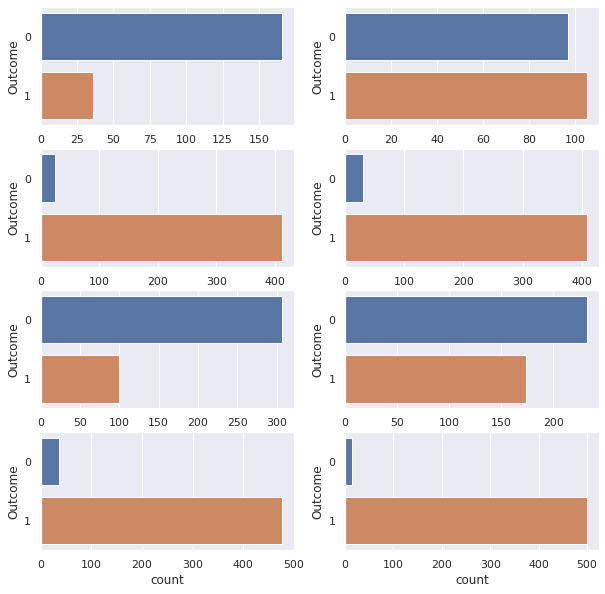

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
for i, j in enumerate(range(0, 8, 2)):
    plt.subplot(4, 2, j+1)
    sns.countplot(y='Outcome', data=all_mono[i])
    plt.subplot(4, 2, j+2)   
    sns.countplot(y='Outcome', data=all_with_mono[i])

In [ ]:
all_mono = pd.concat(all_mono, axis=0)

In [ ]:
all_mono.insert(7, 'is_mono', 1)

In [ ]:
all_with_mono = pd.concat(all_with_mono, axis=0)

In [ ]:
all_with_mono.insert(7, 'is_mono', 0)

In [ ]:
all_data = pd.concat([all_mono, all_with_mono], axis=0)

In [ ]:
all_data[['Age', 'Outcome', 'is_mono', 'Результат', 'Результат_D']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120 entries, 382902 to 380751
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          3120 non-null   int64 
 1   Outcome      3120 non-null   object
 2   is_mono      3120 non-null   int64 
 3   Результат    3120 non-null   object
 4   Результат_D  3120 non-null   object
dtypes: int64(2), object(3)
memory usage: 146.2+ KB


In [ ]:
all_data[['Age', 'Outcome', 'is_mono', 'Результат', 'Результат_D']].columns

Index(['Age', 'Outcome', 'is_mono', 'Результат', 'Результат_D'], dtype='object')

In [ ]:
all_data['Результат'] = all_data['Результат'].apply(pd.to_numeric, errors='coerce')
all_data['Результат_D'] = all_data['Результат_D'].apply(pd.to_numeric, errors='coerce')
all_data['Outcome'] = all_data['Outcome'].apply(pd.to_numeric, errors='coerce')

In [ ]:
all_data.dropna(axis=0, how='any', subset=['Age', 'Outcome', 'is_mono', 'Результат', 'Результат_D'], inplace=True)

In [ ]:
all_data = all_data[~all_data.index.duplicated()]

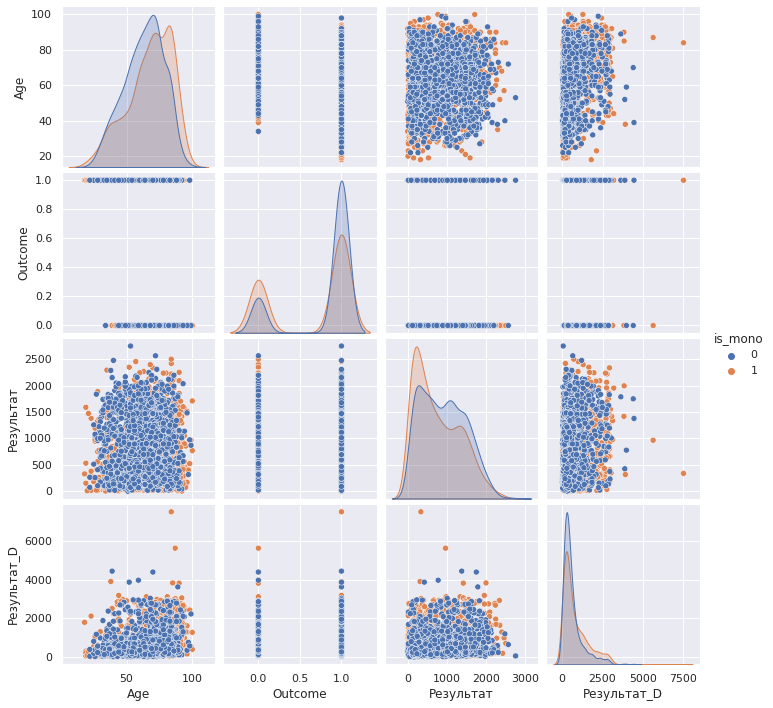

In [ ]:
sns.pairplot(all_data[['Age', 'Outcome', 'is_mono', 'Результат', 'Результат_D']], hue="is_mono")

In [ ]:
len(all_with_mono)

1560

In [ ]:
len(all_mono)

1560

In [ ]:
all_data[['Outcome']] = all_data[['Outcome']].astype(object)

In [ ]:
all_data=pd.get_dummies(all_data)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2684 entries, 382902 to 380751
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Start                                               2684 non-null   datetime64[ns]
 1   End                                                 2684 non-null   datetime64[ns]
 2   Age                                                 2684 non-null   int64         
 3   is_mono                                             2684 non-null   int64         
 4   Дата результата                                     2684 non-null   datetime64[ns]
 5   IDS                                                 2684 non-null   int64         
 6   Дата взятия                                         2684 non-null   datetime64[ns]
 7   Результат                                           2684 non-null   float64       
 8   Р

In [ ]:
pd.pivot_table(all_data[['Outcome_1','Outcome_0','is_mono']],index=['is_mono'])

,Outcome_0,Outcome_1
is_mono,,
0,0.187546,0.812454
1,0.350562,0.649438


# Простая реализация соответствия между двумя классами

In [ ]:
def manhattan(x, y):
  return sum([abs(x[i] - y[i]) for i in range(len(x))]) 

def euclidean(x, y):
  return np.sqrt(sum([pow(x[i] - y[i], 2) for i in range(len(x))]))

def chebyshev(x, y):
  return max([abs(x[i] - y[i]) for i in range(len(x))])

def chord(x, y):
  numerator = sum([x[i]*y[i] for i in range(len(x))])
  denominator = np.sqrt(sum([ pow(x[i], 2) for i in range(len(x))])*sum([ pow(y[i], 2) for i in range(len(y))]))
  return np.sqrt(2*(1 - numerator/denominator))

def correlation(x, y):
  """
  length x must be the same as length y
  """
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  numerator = sum([(x[i] - x_mean)*(y[i] - y_mean) for i in range(len(x))])
  denominator = np.sqrt(sum([ pow(x[i]-x_mean, 2) for i in range(len(x))])*sum([ pow(y[i]-y_mean, 2) for i in range(len(y))]))
  return numerator/denominator

def cosine(x, y):
  numerator = sum([x[i]*y[i] for i in range(len(x))])
  denominator = np.sqrt(sum([ pow(x[i], 2) for i in range(len(x))])*sum([ pow(y[i], 2) for i in range(len(y))]))
  return numerator/denominator

def metrics(x, y, metric='manhattan'):
  rho = {'manhattan': manhattan, 'euclidean': euclidean, 'chebyshev': chebyshev, 'chord': chord, 'correlation': correlation, 'cosine': cosine}
  return rho[metric](x, y)

In [ ]:
main_metrica = 'euclidean'
mono_and_with_mono_male_hard = mono_male_hard.copy()

In [ ]:
# for mono_index, mono_row in mono_male_hard.iterrows():
#   for with_index, with_row in with_mono_male_hard.iterrows():
#     metrics_value = metrics(mono_row.values, with_row.values, main_metrica)
#     if mono_and_with_mono_male_hard.loc[mono_index]['euclidean'] is pd.NA or metrics_value < mono_and_with_mono_male_hard.loc[mono_index]['euclidean']:
#       mono_and_with_mono_male_hard.loc[mono_index, 'with_index'] = with_index
#       mono_and_with_mono_male_hard.loc[mono_index, 'euclidean'] = metrics_value